In [1]:
import json
from matplotlib.patches import Rectangle
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

In [2]:
def draw_boxes(image, v_boxes, v_labels, v_scores):
    plt.figure(figsize=(8, 8))     
    plt.imshow(image)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for i in range(len(v_boxes)):
        lbl = v_labels[i]
        #if lbl!=classlbl:
        #    continue
        box = v_boxes[i]
        # get coordinates
        y1, x1, y2, x2 = box
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='white')
        # draw the box
        ax.add_patch(rect)
        # draw text and score in top left corner
        label = "%s (%.3f)" % (v_labels[i], v_scores[i])
        plt.text(x1, y1, label, color='white')
    # show the plot
    plt.show()

In [3]:
path = "/data1/shared/COCO2017/val2017/"

In [4]:
with open("data.json") as f:
    data_mask = json.load(f)
with open("yolo_objects_COCO2017_0-100.json") as f:
    data_yolo = json.load(f)

In [5]:
count_mask = 0
count_yolo = 0
for id in data_mask:    
    count_mask += len(data_mask[str(id)]['clases_im'])
    count_yolo += len(data_yolo[str(id)]["clases_im"])
print("Promedio mask-rcnn", count_mask/100)
print("Promedio yolo", count_yolo/100)

Promedio mask-rcnn 7.51
Promedio yolo 4.23


397133 ==================================================


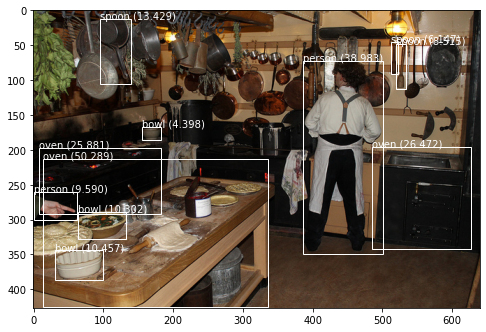

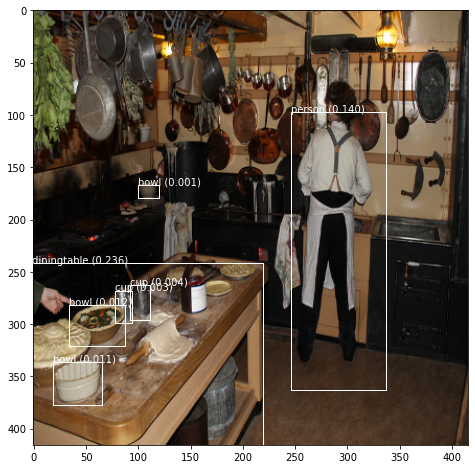

37777 ==================================================


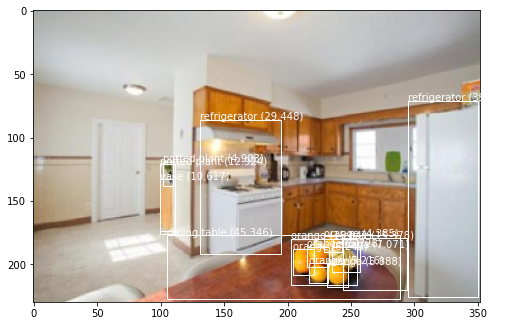

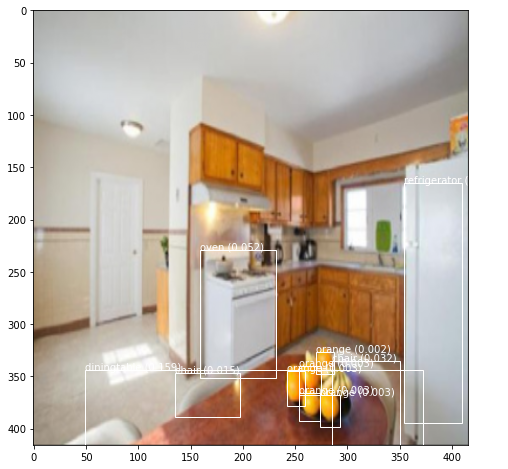

252219 ==================================================


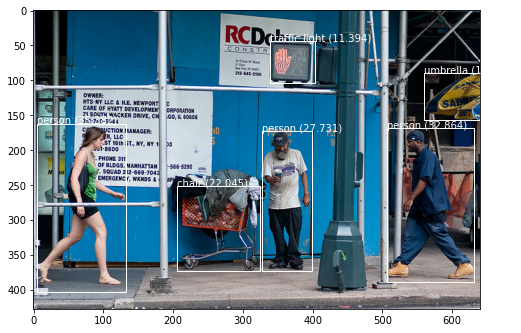

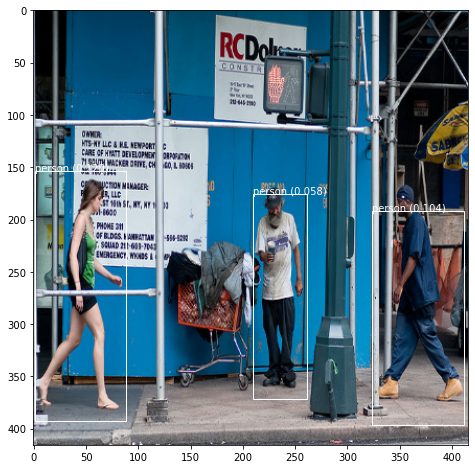

87038 ==================================================


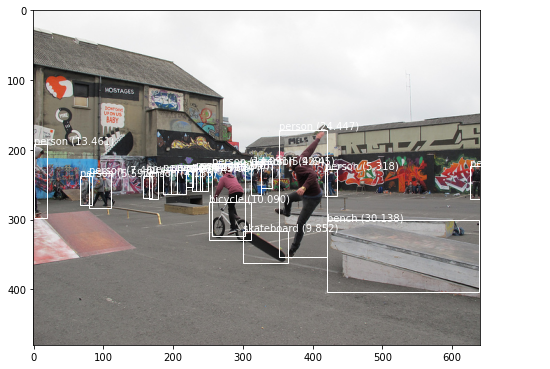

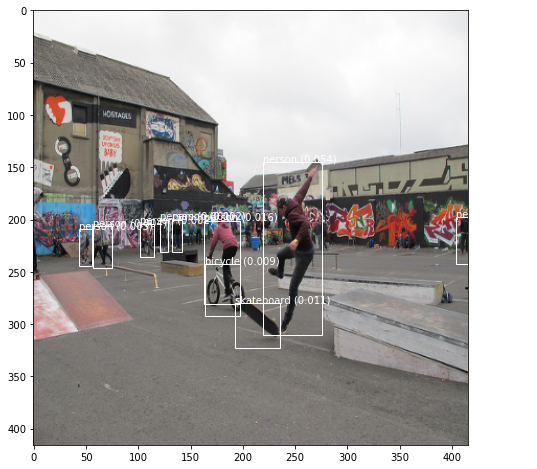

174482 ==================================================


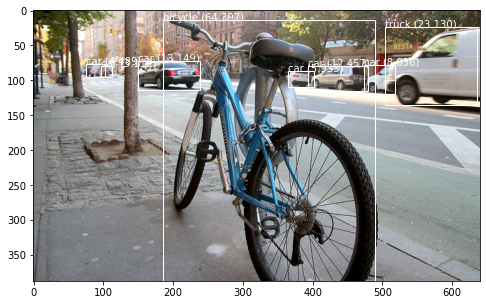

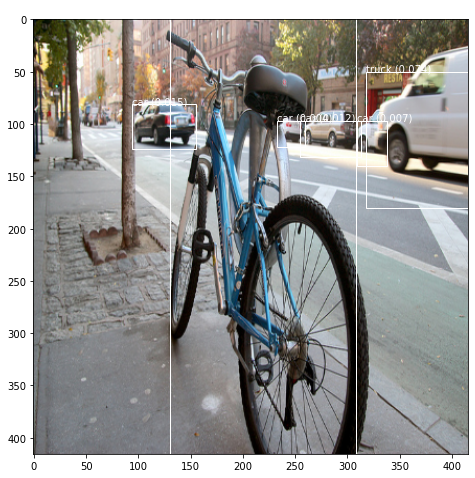

403385 ==================================================


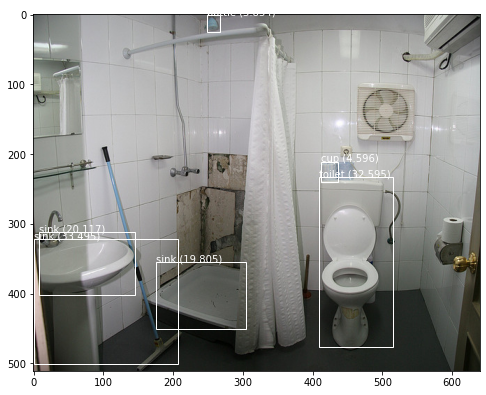

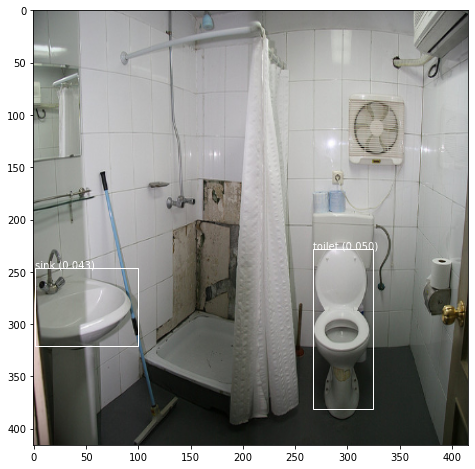

6818 ==================================================


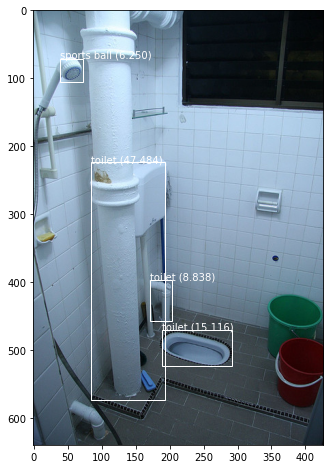

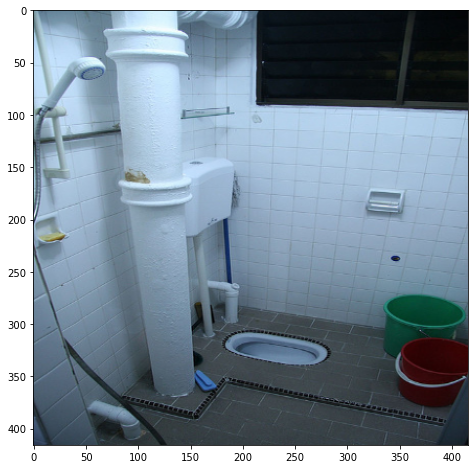

480985 ==================================================


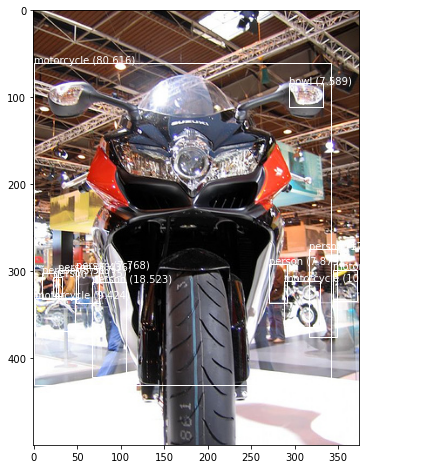

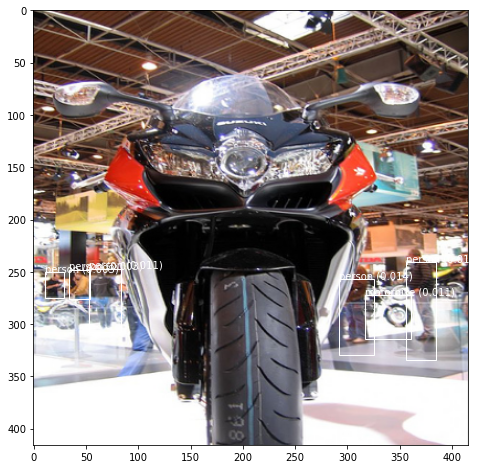

458054 ==================================================


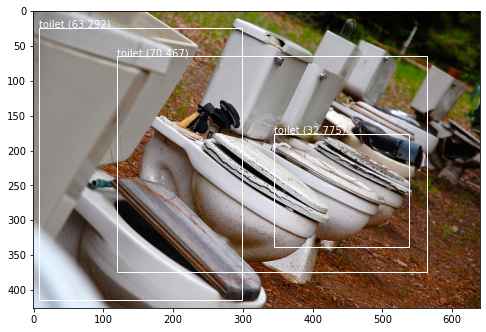

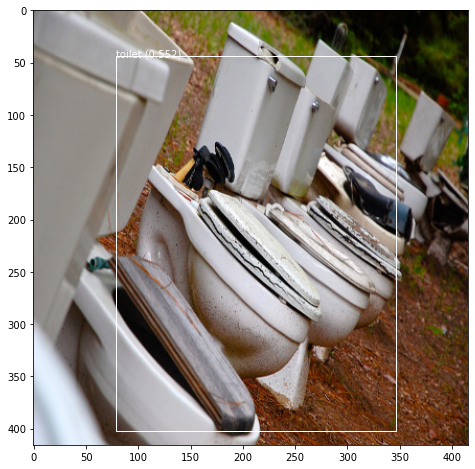

331352 ==================================================


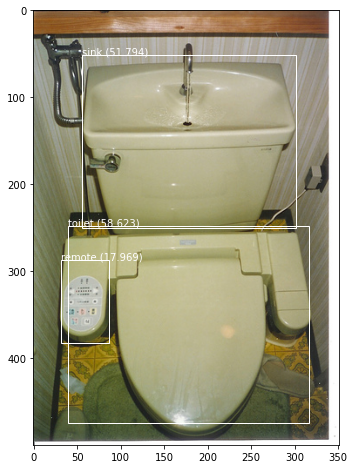

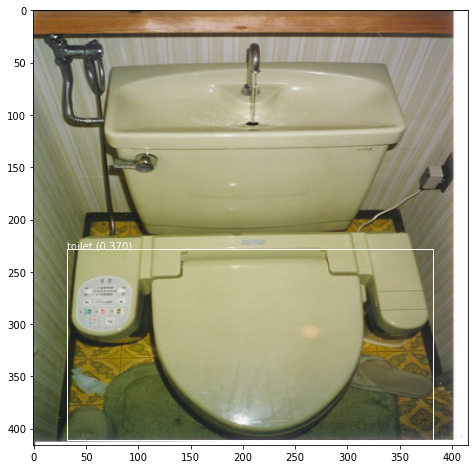

296649 ==================================================


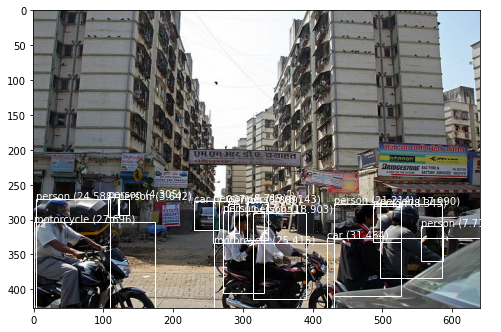

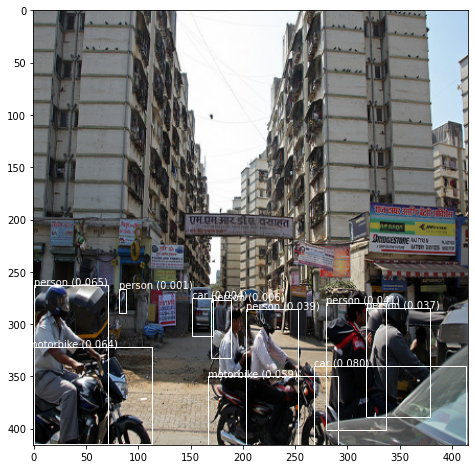

In [6]:
count = 0
for id in data_mask:
    print(id, "="*50)    
    img = imread(path + data_yolo[str(id)]["id_im"][1])
    draw_boxes(img, data_mask[str(id)]['posiciones'], data_mask[str(id)]['clases_im'], data_mask[str(id)]['porcentaje'])
    im = resize(img, (416,416,3), mode="constant", anti_aliasing=False)
    draw_boxes(im, data_yolo[str(id)]['posiciones'], data_yolo[str(id)]['clases_im'], data_yolo[str(id)]['porcentaje'])
    count += 1
    if count>10:
        break